In [ ]:
from itertools import combinations
import os, sys
sys.path.insert(0, os.path.abspath('..'))
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import linprog
import IESDS
import order_k
import BFPSNS
import Linear_programming
import support_enumeration as se

In [3]:
# sys.path.insert(0, os.path.abspath('Kode'))
win = pd.read_csv('winrates.csv', index_col=0)
playrates = pd.read_csv ('playrates.csv', index_col=0)
deck = playrates.index.values # liste af navne på deck
U = win.values # konverteret til numpy
print(U)
print(playrates)
dat = pd.DataFrame(U, index=deck, columns=deck)

[[50.   54.29 35.84 65.05 61.57 66.98 63.65 65.78 43.55 62.72 74.99 62.15
  64.78 50.97 49.27 69.41 72.15 58.5  69.06 61.93 77.06 67.48 84.29 66.87
  58.7  69.81 57.42 55.19 62.47 60.02]
 [45.64 50.   50.18 58.12 52.27 43.88 51.05 43.82 46.96 65.66 60.13 85.36
  75.41 71.17 55.14 76.99 71.67 65.54 34.17 49.51 62.59 53.77 84.74 68.62
  67.77 83.02 69.29 47.33 47.08 68.31]
 [64.14 49.81 50.   33.68 54.8  44.35 44.49 33.1  52.67 51.81 50.47 54.83
  43.06 65.   50.3  49.97 58.14 57.97 41.61 54.83 53.52 69.5  69.27 54.66
  41.97 53.71 54.07 59.36 51.25 76.4 ]
 [34.91 41.87 66.31 50.   48.25 61.7  48.86 53.65 61.02 57.45 57.71 74.95
  73.12 54.92 70.86 85.96 70.93 53.53 70.17 47.19 56.09 53.5  84.05 70.96
  78.27 80.7  77.14 54.41 65.16 46.15]
 [38.41 47.7  45.19 51.73 50.   64.51 49.11 57.46 50.93 56.29 61.99 55.13
  66.39 47.24 60.63 74.01 72.26 65.9  70.72 52.58 53.44 50.49 77.36 67.28
  73.78 62.08 71.67 57.6  70.81 41.47]
 [32.96 56.11 55.64 38.28 35.48 50.   32.33 31.27 44.85 46.24 42.

## Opgave 2:

##### 2.1 Argument ́er for, at spillet kan modelleres som et nulsumsspil, opstil spillet, og find alle strengt dominerede strategier.

In [4]:
# dat, playrates = hst.read_data()

In [5]:
# ax=playrates.plot.bar(ylabel='Pct. of players'); 
# ax.set_xticklabels(playrates.deck); 
# plt.tight_layout(); 

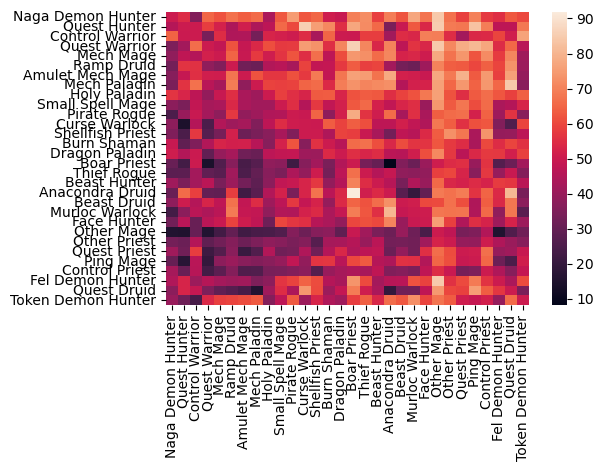

In [6]:
rows = dat.index
cols = dat.columns
decks = rows
sns.heatmap(dat, xticklabels=cols, yticklabels=rows); 
plt.tight_layout(); 

In [7]:
decks

Index(['Naga Demon Hunter', 'Quest Hunter', 'Control Warrior', 'Quest Warrior',
       'Mech Mage', 'Ramp Druid', 'Amulet Mech Mage', 'Mech Paladin',
       'Holy Paladin', 'Small Spell Mage', 'Pirate Rogue', 'Curse Warlock',
       'Shellfish Priest', 'Burn Shaman', 'Dragon Paladin', 'Boar Priest',
       'Thief Rogue', 'Beast Hunter', 'Anacondra Druid', 'Beast Druid',
       'Murloc Warlock', 'Face Hunter', 'Other Mage', 'Other Priest',
       'Quest Priest', 'Ping Mage', 'Control Priest', 'Fel Demon Hunter',
       'Quest Druid', 'Token Demon Hunter'],
      dtype='object')

In [8]:
U1 = dat.values # numpy array 
U2 = -dat.values

In [9]:
u1, u2, aa1, aa2 = IESDS.IESDS(U1, U2)

a=10 is strictly dominated by a=3
a=15 is strictly dominated by a=1
a=16 is strictly dominated by a=3
a=22 is strictly dominated by a=0
a=23 is strictly dominated by a=1
a=25 is strictly dominated by a=8
a=26 is strictly dominated by a=2
a=10 is strictly dominated by a=3
a=15 is strictly dominated by a=1
a=16 is strictly dominated by a=3
a=22 is strictly dominated by a=0
a=23 is strictly dominated by a=1
a=25 is strictly dominated by a=8
a=26 is strictly dominated by a=2
No further strategies to delete after 1 iterations


In [10]:
na1,na2 = U1.shape 
aa_dominated = [a for a in range(na2) if a not in aa1] # FILL IN: based on aa1 
print(f'Dominated strategies: {decks[aa_dominated]}')

Dominated strategies: Index(['Pirate Rogue', 'Boar Priest', 'Thief Rogue', 'Other Mage',
       'Other Priest', 'Ping Mage', 'Control Priest'],
      dtype='object')


### 2.

In [11]:
U1 = dat.iloc[aa1, aa2].values
U2 = -U1
non_dom_decks = decks[aa1]

for i in range(11):
    if i > 0:
        print(f"{i}th order rational player plays: {non_dom_decks[order_k.order_k_rationality(U1, U2, i) > 0][0]}")

1th order rational player plays: Naga Demon Hunter
2th order rational player plays: Control Warrior
3th order rational player plays: Mech Paladin
4th order rational player plays: Naga Demon Hunter
5th order rational player plays: Control Warrior
6th order rational player plays: Mech Paladin
7th order rational player plays: Naga Demon Hunter
8th order rational player plays: Control Warrior
9th order rational player plays: Mech Paladin
10th order rational player plays: Naga Demon Hunter


### 3.

In [12]:
U1 = dat.values
U2 = -dat.values

playrates1 = playrates.copy()

playrates_sorted = playrates1.sort_values(by='deck', ascending=True)
playrates_values= playrates_sorted.values
# print(playrates_values.shape)
# print(playrates_values)

expected_payoffs = U1 @ playrates_values[:, 0]
max_index = np.argmax(expected_payoffs)
print(decks[max_index])

Quest Warrior


### 4.

In [13]:
U1 = dat.iloc[aa1, aa2].values
U2 = -U1

pure_res = BFPSNS.nash_eq_brute_force(U1, U2)

print(f'Pure strategies: {pure_res}')

Pure strategies: []


In [14]:
mixed_res = Linear_programming.solve_by_LP(U1)
print(f'Mixed strategies: {mixed_res}')

Mixed strategies: [0.32463971 0.07466532 0.32254981 0.21374041 0.         0.
 0.         0.06440475 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]


In [15]:
# payoff for column‐player is U2 = -U1
M = U2.T.copy()             # shape (n,n)
min_entry = M.min()
K = -min_entry if min_entry < 0 else 0

# shift so all entries >= 0
M_shifted = M + K

# now call your LP‐solver exactly as is:
q = Linear_programming.solve_by_LP(M_shifted)
print("Column mix:", q)


Column mix: [0.32402173 0.07534422 0.32245693 0.21428467 0.         0.
 0.         0.06389245 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]


## 5.

In [36]:
# (Anacondra druid, Control Warrior)
# Winrate 54.47%

d1 = ['Mech Mage', 'Control Warrior'] # Arne
d2 = ['Naga Demon Hunter', 'Quest Hunter'] # Birger - Lucas
win_sub = win.loc[d1, d2] # 2*2 dataframe
U = win_sub.values # numpy

#Find all 2 combinations of an array
def find_combinations(deck, r):
    return list(combinations(deck, r))

kombinationer = find_combinations(decks, 2)

max_v = 0

for i in kombinationer:
    d1 = i
    d2 = ['Naga Demon Hunter', 'Quest Hunter'] 
    win_sub = win.loc[d1, d2] # 2*2 dataframe
    U1 = win_sub.values # numpy
    U2 = -U1
    NE = se.msne(U1,U2)
    sigma1 = NE[0][0]
    sigma2 = NE[0][1].T
    #forventet nytte:
    v1 = sigma1 @ U1 @ sigma2
    print(v1)
    if v1 > max_v:
        max_v = v1
        best_deck = i
print(f"Best decks: {best_deck} with expected value {max_v}")
    


50.0
53.257819548872185
50.0
50.0
50.0
50.0
50.0
53.58341176470588
50.0
50.0
50.0
50.0
50.0
50.30008866995074
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
49.95567683253077
45.64
45.64
45.64
45.64
45.64
53.03
45.64
45.64
45.64
45.64
46.2400325732899
47.802935420743644
45.64
45.64
45.64
45.64
45.64
45.64
45.64
45.64
45.64
45.64
45.64
45.64
45.64
45.64
45.64
49.81
49.81
52.218724653148335
49.81
52.3153827092511
53.03
49.81
49.81
49.81
49.81
49.81
49.81
49.81
49.81
49.81
54.46928716490658
50.168651475532315
49.81
49.81
49.81
49.81
49.81
49.81
49.81
51.645528089887634
51.30471736204575
49.81
38.41
34.91
36.32
34.91
53.03
36.55303951367781
34.91
35.58153846153844
35.02474701534963
38.525817378497784
44.85
34.91
34.91
38.15198704103672
34.91
38.04
34.91
34.91
34.91
34.91
37.680106051154084
34.91
37.74131173659054
44.74
37.52
37.21935081967213
38.41
38.41
38.41
53.03
38.41
38.41
38.41
38.41
41.75238385893523
45.95237623762377
38.41
38.41
40.11106658446362
38.41
3